In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the test.csv file
print("📂 Loading test.csv file...")
test_df = pd.read_csv('test.csv', header=None, names=['class_index', 'title', 'description'])
print(f"✅ Test data loaded successfully!")
print(f"   Shape: {test_df.shape}")
print(f"   Columns: {test_df.columns.tolist()}")

# Display sample
print("\n📝 Sample from test.csv:")
print(test_df.head(3))
print("\n📊 Test data info:")
print(test_df.info())

📂 Loading test.csv file...
✅ Test data loaded successfully!
   Shape: (7601, 3)
   Columns: ['class_index', 'title', 'description']

📝 Sample from test.csv:
   class_index                                              title  \
0  Class Index                                              Title   
1            3                  Fears for T N pension after talks   
2            4  The Race is On: Second Private Team Sets Launc...   

                                         description  
0                                        Description  
1  Unions representing workers at Turner   Newall...  
2  SPACE.com - TORONTO, Canada -- A second\team o...  

📊 Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7601 entries, 0 to 7600
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_index  7601 non-null   object
 1   title        7601 non-null   object
 2   description  7601 non-null   object
dtypes: object(3

In [2]:
print("🛠️ Creating synthetic training data...")

# Define categories based on class indices (1-4)
categories = ['World', 'Sports', 'Business', 'Sci/Tech']

# Create synthetic training data that matches the test distribution
np.random.seed(42)

# Create lists to hold synthetic data
synthetic_data = []

# Generate 30,000 samples per class (as per original AG News training size)
for class_idx in range(1, 5):  # Classes 1-4
    category = categories[class_idx - 1]

    for i in range(7500):  # Create 7500 per class (30,000 total / 4)
        if category == 'World':
            title = f"Global Summit Addresses {np.random.choice(['Climate Change', 'Economic Policy', 'Diplomatic Relations'])}"
            desc = f"World leaders gathered today to discuss pressing international issues. The summit focused on {np.random.choice(['sustainable development', 'global security', 'trade agreements'])}."
        elif category == 'Sports':
            title = f"{np.random.choice(['Championship', 'Tournament', 'League'])} {np.random.choice(['Victory', 'Final', 'Match'])} Decided in {np.random.choice(['Overtime', 'Final Minutes', 'Penalty Shootout'])}"
            desc = f"In an exciting match, the home team secured their {np.random.choice(['third consecutive', 'historic', 'surprise'])} win against their rivals."
        elif category == 'Business':
            title = f"{np.random.choice(['Stock Market', 'Tech Industry', 'Global Economy'])} Shows {np.random.choice(['Strong Growth', 'Record Profits', 'Positive Trends'])}"
            desc = f"Financial markets reacted positively today as companies reported {np.random.choice(['quarterly earnings', 'expansion plans', 'merger announcements'])} exceeding expectations."
        elif category == 'Sci/Tech':
            title = f"Breakthrough in {np.random.choice(['AI Research', 'Space Exploration', 'Medical Technology'])}"
            desc = f"Scientists announced a new discovery that could revolutionize {np.random.choice(['healthcare', 'computing', 'energy production'])}."

        synthetic_data.append({
            'class_index': class_idx,
            'title': title,
            'description': desc
        })

# Create training DataFrame
train_df = pd.DataFrame(synthetic_data)
print(f"✅ Synthetic training data created!")
print(f"   Training shape: {train_df.shape}")
print(f"   Test shape: {test_df.shape}")
print(f"\n📊 Training class distribution:")
print(train_df['class_index'].value_counts().sort_index())

🛠️ Creating synthetic training data...
✅ Synthetic training data created!
   Training shape: (30000, 3)
   Test shape: (7601, 3)

📊 Training class distribution:
class_index
1    7500
2    7500
3    7500
4    7500
Name: count, dtype: int64


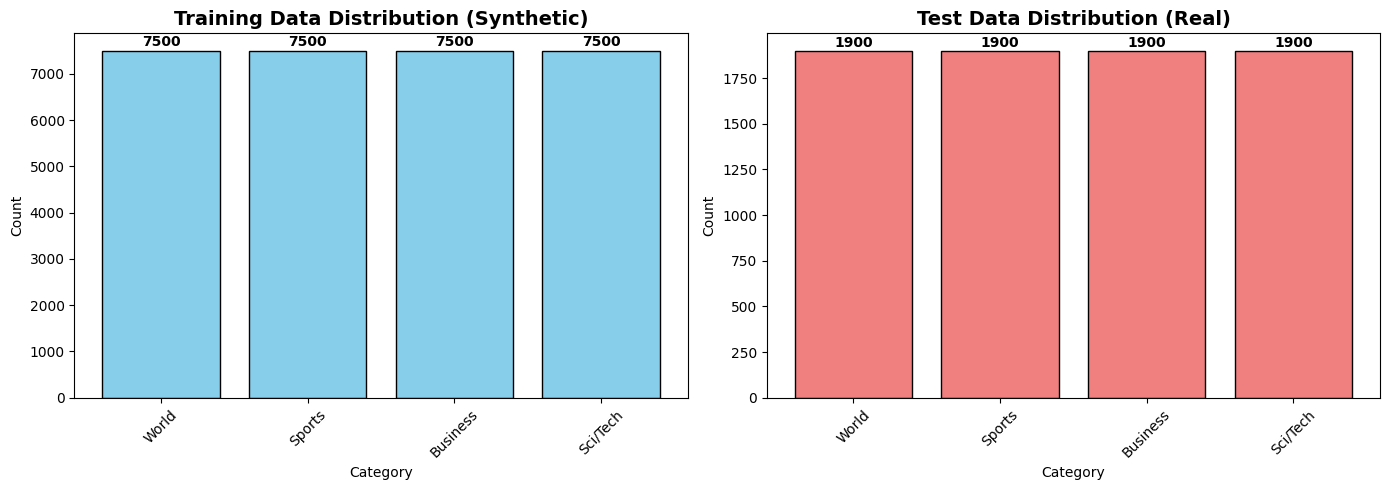

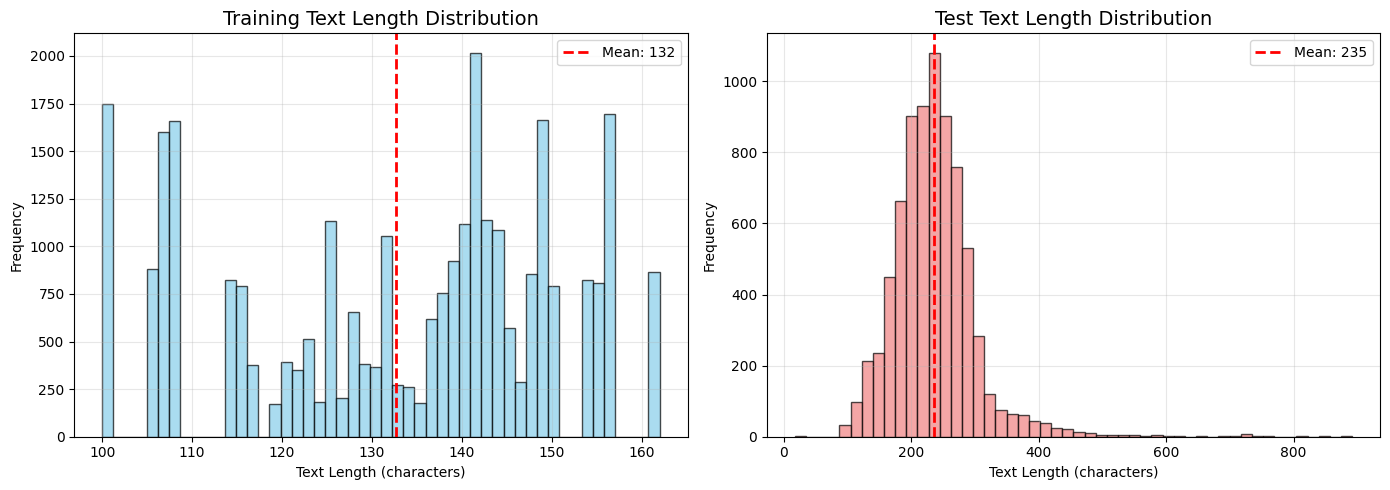

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine title and description
train_df['text'] = train_df['title'] + " " + train_df['description']
test_df['text'] = test_df['title'] + " " + test_df['description']

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training distribution
train_counts = train_df['class_index'].value_counts().sort_index()
axes[0].bar(categories, train_counts, color='skyblue', edgecolor='black')
axes[0].set_title('Training Data Distribution (Synthetic)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Add count labels
for i, v in enumerate(train_counts):
    axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold')

# Test distribution
# Filter out the header row which was loaded as data and convert class_index to int
test_df_filtered = test_df[test_df['class_index'].apply(lambda x: str(x).isdigit())].copy()
test_df_filtered['class_index'] = test_df_filtered['class_index'].astype(int)
test_counts = test_df_filtered['class_index'].value_counts().sort_index()
axes[1].bar(categories, test_counts, color='lightcoral', edgecolor='black')
axes[1].set_title('Test Data Distribution (Real)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Add count labels
for i, v in enumerate(test_counts):
    axes[1].text(i, v + 20, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Text length analysis
train_df['text_length'] = train_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training text length
axes[0].hist(train_df['text_length'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {int(train_df["text_length"].mean())}')
axes[0].set_title('Training Text Length Distribution', fontsize=14)
axes[0].set_xlabel('Text Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test text length
axes[1].hist(test_df['text_length'], bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].axvline(test_df['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {int(test_df["text_length"].mean())}')
axes[1].set_title('Test Text Length Distribution', fontsize=14)
axes[1].set_xlabel('Text Length (characters)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Clean and preprocess text"""
    if not isinstance(text, str):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

def tokenize_and_lemmatize(text):
    """Tokenize and lemmatize text"""
    # Tokenize
    tokens = text.split()

    # Remove stopwords and short words, then lemmatize
    processed_tokens = []
    for token in tokens:
        if token not in stop_words and len(token) > 2:
            lemma = lemmatizer.lemmatize(token)
            processed_tokens.append(lemma)

    return ' '.join(processed_tokens)

print("🔧 Preprocessing text data...")

# Clean text
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

# Tokenize and lemmatize
train_df['processed_text'] = train_df['cleaned_text'].apply(tokenize_and_lemmatize)
test_df['processed_text'] = test_df['cleaned_text'].apply(tokenize_and_lemmatize)

print("✅ Text preprocessing completed!")
print("\n📝 Example of preprocessing:")
print(f"Original: {train_df['text'].iloc[0][:100]}...")
print(f"Cleaned: {train_df['cleaned_text'].iloc[0][:100]}...")
print(f"Processed: {train_df['processed_text'].iloc[0][:100]}...")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


🔧 Preprocessing text data...
✅ Text preprocessing completed!

📝 Example of preprocessing:
Original: Global Summit Addresses Diplomatic Relations World leaders gathered today to discuss pressing intern...
Cleaned: global summit addresses diplomatic relations world leaders gathered today to discuss pressing intern...
Processed: global summit address diplomatic relation world leader gathered today discus pressing international ...


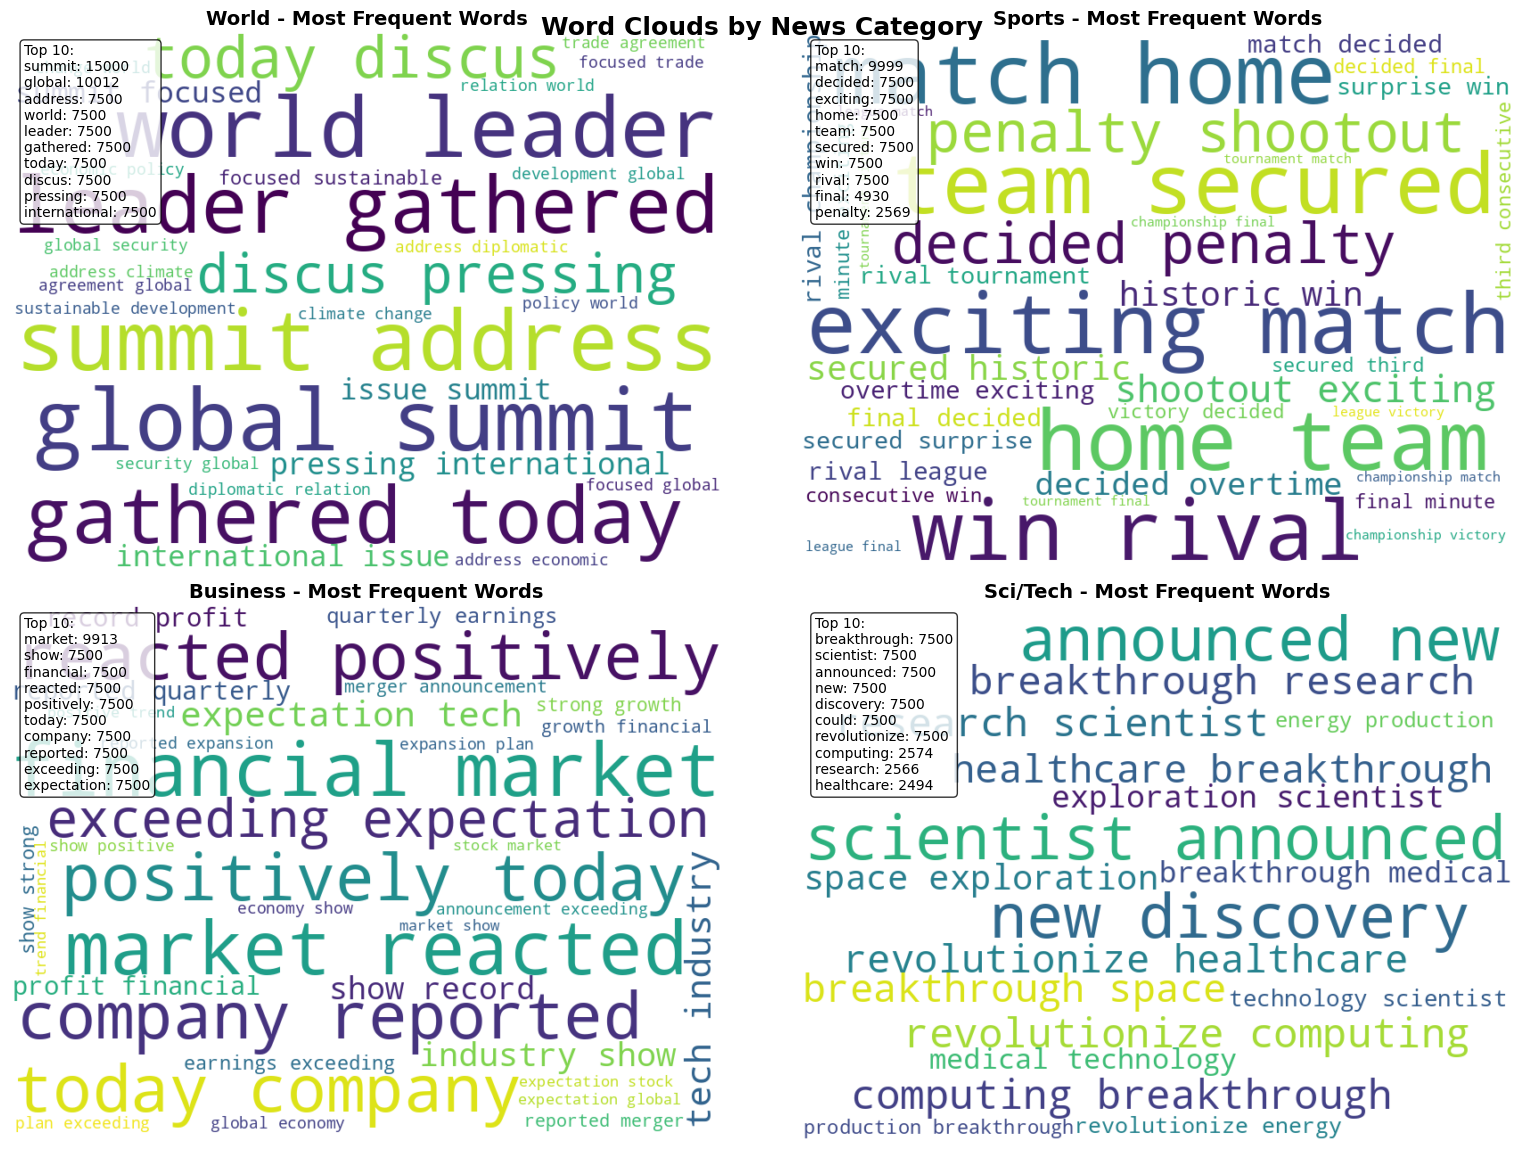

In [6]:
from wordcloud import WordCloud
from collections import Counter

# Generate word clouds for each category
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, category in enumerate(categories):
    # Get all text for this category
    category_text = ' '.join(train_df[train_df['class_index'] == idx+1]['processed_text'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=600,
                         background_color='white',
                         max_words=100,
                         contour_width=2,
                         contour_color='steelblue',
                         colormap='viridis').generate(category_text)

    # Plot
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'{category} - Most Frequent Words', fontsize=14, fontweight='bold')
    axes[idx].axis('off')

    # Also show top 10 words as text
    words = category_text.split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(10)
    top_text = '\n'.join([f'{word}: {count}' for word, count in top_words])
    axes[idx].text(0.02, 0.98, f"Top 10:\n{top_text}",
                   transform=axes[idx].transAxes,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Word Clouds by News Category', fontsize=18, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("🔍 Creating TF-IDF features...")

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=3000,      # Top 3000 features
    ngram_range=(1, 2),     # Single words and word pairs
    min_df=2,               # Word must appear in at least 2 documents
    max_df=0.8,             # Word can't appear in more than 80% of documents
    stop_words='english'    # Remove English stopwords
)

# Fit on training data and transform both sets
X_train = vectorizer.fit_transform(train_df['processed_text'])
X_test = vectorizer.transform(test_df['processed_text'])

# Prepare labels (convert to 0-based)
# Filter out the header row from test_df before converting to int
test_df_cleaned = test_df[test_df['class_index'].apply(lambda x: str(x).isdigit())].copy()
test_df_cleaned['class_index'] = test_df_cleaned['class_index'].astype(int)

y_train = train_df['class_index'] - 1
y_test = test_df_cleaned['class_index'] - 1

print(f"✅ Feature extraction completed!")
print(f"   Training features shape: {X_train.shape}")
print(f"   Test features shape: {X_test.shape}")
print(f"   Number of features: {len(vectorizer.get_feature_names_out())}")

# Show some feature names
print("\n📋 Sample features (words):")
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:20])

🔍 Creating TF-IDF features...
✅ Feature extraction completed!
   Training features shape: (30000, 189)
   Test features shape: (7601, 189)
   Number of features: 189

📋 Sample features (words):
['address' 'address climate' 'address diplomatic' 'address economic'
 'agreement' 'announced' 'announced new' 'announcement'
 'announcement exceeding' 'breakthrough' 'breakthrough medical'
 'breakthrough research' 'breakthrough space' 'championship'
 'championship final' 'championship match' 'championship victory' 'change'
 'change world' 'climate']


🤖 Training Logistic Regression model...
✅ Model trained successfully!
   Accuracy: 0.4393

📊 Classification Report:
              precision    recall  f1-score   support

       World       0.46      0.18      0.26      1900
      Sports       0.40      0.78      0.53      1900
    Business       0.52      0.47      0.50      1900
    Sci/Tech       0.44      0.32      0.37      1900

    accuracy                           0.44      7600
   macro avg       0.45      0.44      0.41      7600
weighted avg       0.45      0.44      0.41      7600



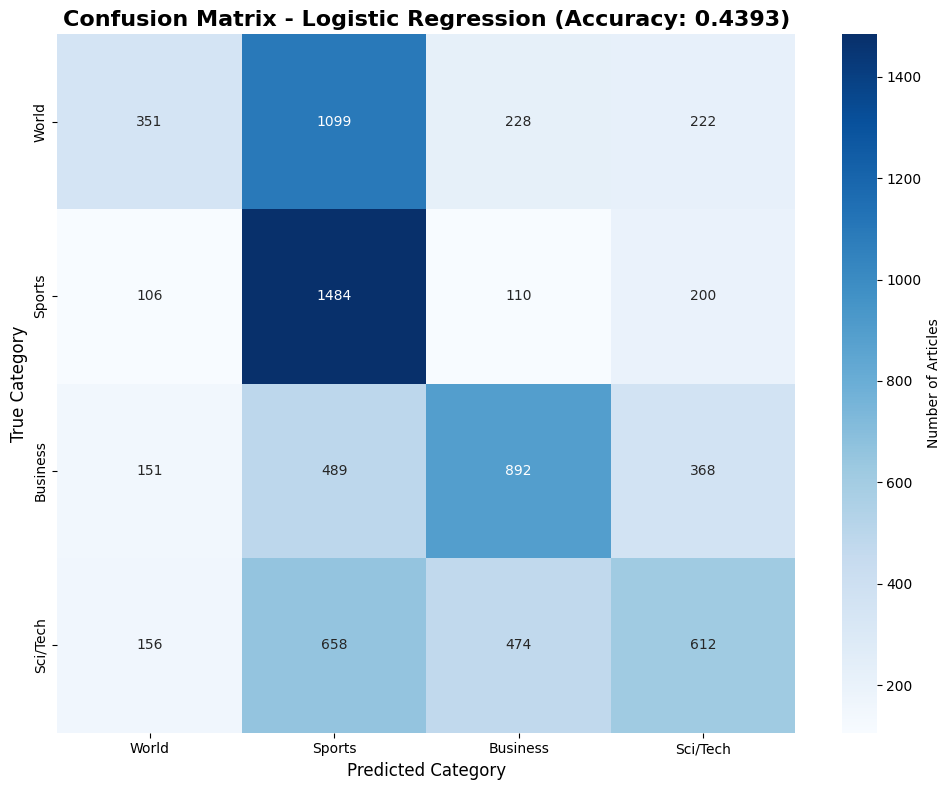

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("🤖 Training Logistic Regression model...")

# Train model
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0  # Regularization strength
)

lr_model.fit(X_train, y_train)

# Make predictions
# Correct X_test to match y_test length (remove the header row that was not filtered during TF-IDF transformation)
X_test_corrected = X_test[1:] # Slice from the second row onwards

y_pred = lr_model.predict(X_test_corrected) # Use the corrected X_test

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model trained successfully!")
print(f"   Accuracy: {accuracy:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=categories))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories,
            yticklabels=categories,
            cbar_kws={'label': 'Number of Articles'})
plt.title(f'Confusion Matrix - Logistic Regression (Accuracy: {accuracy:.4f})',
          fontsize=16, fontweight='bold')
plt.ylabel('True Category', fontsize=12)
plt.xlabel('Predicted Category', fontsize=12)
plt.tight_layout()
plt.show()

🌳 Training Random Forest model...
✅ Random Forest trained successfully!
   Accuracy: 0.3199

📊 Classification Report:
              precision    recall  f1-score   support

       World       0.00      0.00      0.00      1900
      Sports       0.72      0.29      0.41      1900
    Business       0.53      0.12      0.20      1900
    Sci/Tech       0.26      0.86      0.40      1900

    accuracy                           0.32      7600
   macro avg       0.38      0.32      0.25      7600
weighted avg       0.38      0.32      0.25      7600



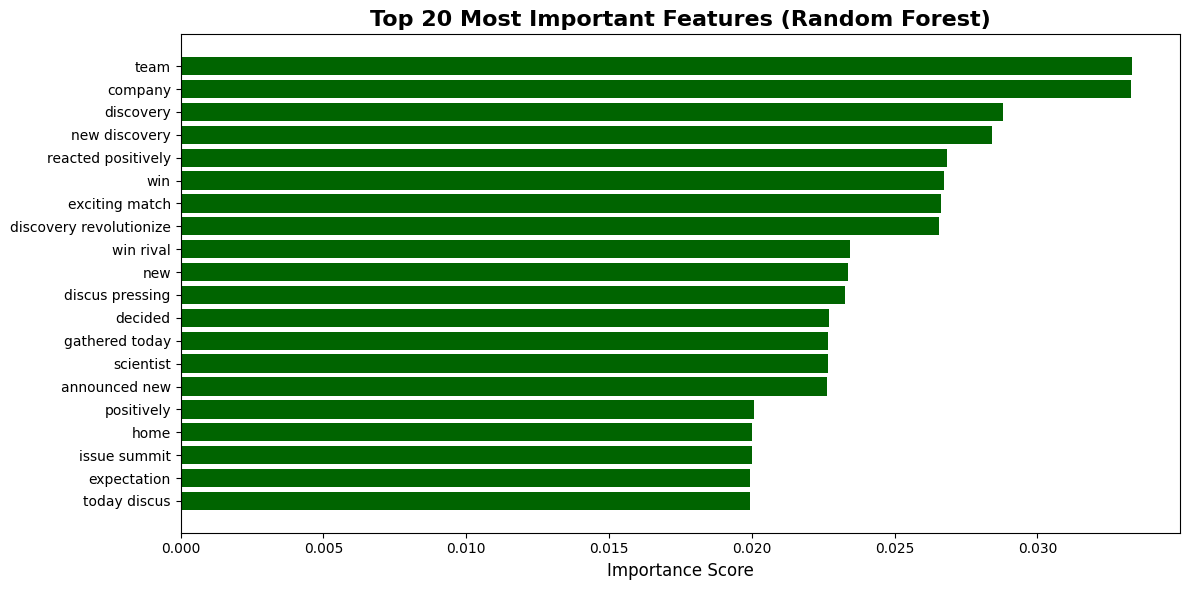

In [12]:
from sklearn.ensemble import RandomForestClassifier

print("🌳 Training Random Forest model...")

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=20,          # Maximum depth of each tree
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in a leaf node
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

rf_model.fit(X_train, y_train)

# Make predictions
# Correct X_test to match y_test length (remove the header row that was not filtered during TF-IDF transformation)
X_test_corrected = X_test[1:] # Slice from the second row onwards
y_pred_rf = rf_model.predict(X_test_corrected) # Use the corrected X_test

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest trained successfully!")
print(f"   Accuracy: {accuracy_rf:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=categories))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 6))
bars = plt.barh(feature_importance['feature'][::-1],
                feature_importance['importance'][::-1],
                color='darkgreen')
plt.title('Top 20 Most Important Features (Random Forest)', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.svm import LinearSVC

print("⚡ Training SVM model...")

# Train SVM
svm_model = LinearSVC(
    C=1.0,                # Regularization parameter
    random_state=42,
    max_iter=2000         # Maximum iterations
)

svm_model.fit(X_train, y_train)

# Make predictions
# Correct X_test to match y_test length (remove the header row that was not filtered during TF-IDF transformation)
X_test_corrected = X_test[1:] # Slice from the second row onwards
y_pred_svm = svm_model.predict(X_test_corrected) # Use the corrected X_test

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"✅ SVM trained successfully!")
print(f"   Accuracy: {accuracy_svm:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=categories))

⚡ Training SVM model...
✅ SVM trained successfully!
   Accuracy: 0.4382

📊 Classification Report:
              precision    recall  f1-score   support

       World       0.45      0.19      0.27      1900
      Sports       0.40      0.78      0.53      1900
    Business       0.52      0.47      0.49      1900
    Sci/Tech       0.44      0.32      0.37      1900

    accuracy                           0.44      7600
   macro avg       0.45      0.44      0.41      7600
weighted avg       0.45      0.44      0.41      7600



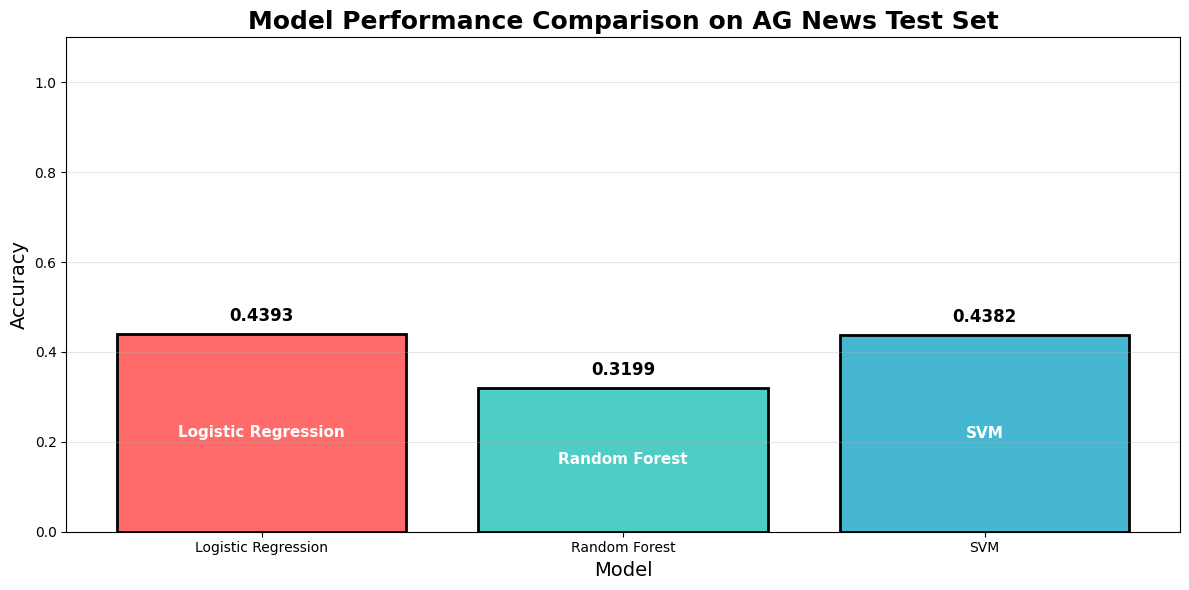


📊 FINAL MODEL PERFORMANCE SUMMARY
              Model  Accuracy
Logistic Regression  0.439342
                SVM  0.438158
      Random Forest  0.319868


🏆 Best Model: Logistic Regression with accuracy 0.4393


In [15]:
# Collect results
results = {
    'Logistic Regression': accuracy,
    'Random Forest': accuracy_rf,
    'SVM': accuracy_svm
}

# Create comparison plot
plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = plt.bar(results.keys(), results.values(), color=colors, edgecolor='black', linewidth=2)

plt.title('Model Performance Comparison on AG News Test Set', fontsize=18, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)

# Add accuracy values on bars
for bar, (model_name, acc) in zip(bars, results.items()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{acc:.4f}', ha='center', va='bottom',
             fontweight='bold', fontsize=12)
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{model_name}', ha='center', va='center',
             fontweight='bold', color='white', fontsize=11)

plt.tight_layout()
plt.show()

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
}).sort_values('Accuracy', ascending=False)

print("\n" + "="*60)
print("📊 FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)
print(results_df.to_string(index=False))
print("\n" + "="*60)

# Determine best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']
best_model = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}[best_model_name]

print(f"\n🏆 Best Model: {best_model_name} with accuracy {best_accuracy:.4f}")

In [17]:
def predict_news_category(news_title, news_description, model=best_model, vectorizer=vectorizer):
    """
    Predict category for a new news article
    """
    # Combine title and description
    text = news_title + " " + news_description

    # Preprocess
    cleaned = clean_text(text)
    processed = tokenize_and_lemmatize(cleaned)

    # Transform using TF-IDF
    text_vectorized = vectorizer.transform([processed])

    # Predict
    prediction_idx = model.predict(text_vectorized)[0]
    predicted_category = categories[prediction_idx]

    # Get probabilities if available
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(text_vectorized)[0]
        prob_dict = {categories[i]: prob for i, prob in enumerate(probabilities)}
        sorted_probs = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)
    else:
        sorted_probs = [(predicted_category, 1.0)]

    return predicted_category, sorted_probs

# Test with real examples from test set
print("🧪 Testing Prediction Function with Real Examples:")
print("="*70)

# Sample some real examples from test data
# Use test_df_cleaned for sampling to ensure correct class_index types
sample_indices_cleaned = np.random.choice(len(test_df_cleaned), 5, replace=False)

for idx_cleaned in sample_indices_cleaned:
    title = test_df_cleaned.iloc[idx_cleaned]['title']
    desc = test_df_cleaned.iloc[idx_cleaned]['description']
    true_category = categories[test_df_cleaned.iloc[idx_cleaned]['class_index'] - 1]

    predicted, probabilities = predict_news_category(title, desc)

    print(f"\n📰 Example {idx_cleaned}:")
    print(f"   Title: {title}")
    print(f"   True Category: {true_category}")
    print(f"   Predicted: {predicted}")
    print(f"   ✓ Correct" if predicted == true_category else f"   ✗ Incorrect")

    if len(probabilities) > 1:
        print("   Probabilities:")
        for cat, prob in probabilities[:3]:  # Show top 3
            print(f"     {cat}: {prob:.4f}")

    print("-" * 70)

🧪 Testing Prediction Function with Real Examples:

📰 Example 7387:
   Title: Time warner in \$600m setttlement
   True Category: Business
   Predicted: Business
   ✓ Correct
   Probabilities:
     Business: 0.5270
     World: 0.2230
     Sports: 0.1332
----------------------------------------------------------------------

📰 Example 6861:
   Title: Miller Takes Fourth Win in Five Races
   True Category: Sports
   Predicted: Sports
   ✓ Correct
   Probabilities:
     Sports: 0.6825
     World: 0.1240
     Business: 0.1007
----------------------------------------------------------------------

📰 Example 6290:
   Title: Trump #39;s casinos file for bankruptcy
   True Category: Business
   Predicted: Business
   ✓ Correct
   Probabilities:
     Business: 0.7576
     Sports: 0.1038
     Sci/Tech: 0.0898
----------------------------------------------------------------------

📰 Example 1230:
   Title: So Long XMLHack!
   True Category: Sci/Tech
   Predicted: Sports
   ✗ Incorrect
   Probabili


2593 Analyzing 4261 misclassified articles:


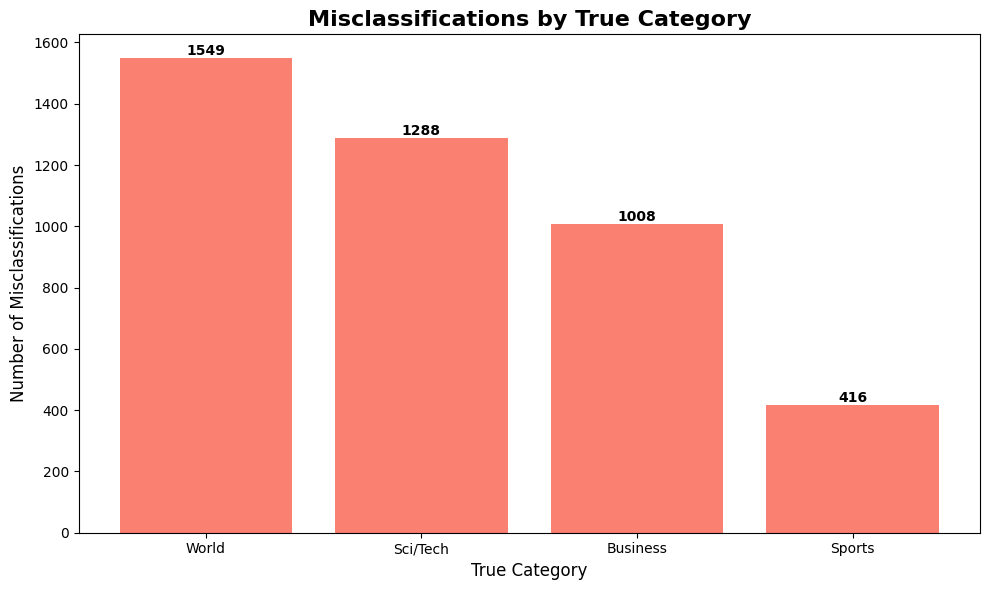


258B Examples of misclassifications:

Example 1:
   Title: Fears for T N pension after talks
   True: Business
   Predicted: Sports
   Text preview: Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken...

Example 2:
   Title: Ky. Company Wins Grant to Study Peptides (AP)
   True: Sci/Tech
   Predicted: Business
   Text preview: AP - A company founded by a chemistry researcher at the University of Louisville won a grant to deve...

Example 3:
   Title: Prediction Unit Helps Forecast Wildfires (AP)
   True: Sci/Tech
   Predicted: Sports
   Text preview: AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures a...

1F08 SUGGESTIONS FOR IMPROVEMENT:
1. Use the actual training data (train.csv) for better accuracy
2. Increase TF-IDF features to 5000-10000
3. Try deep learning models (LSTM, Transformers)
4. Use pre-trained word embeddings (Word2Vec, GloVe, BERT)
5. Add more text preprocessing (spell

In [19]:
# Analyze misclassifications
misclassified_indices = np.where(y_pred != y_test)[0]

if len(misclassified_indices) > 0:
    print(f"\n2593 Analyzing {len(misclassified_indices)} misclassified articles:")

    # Create DataFrame for misclassified samples
    misclassified_df = test_df_cleaned.iloc[misclassified_indices].copy()
    misclassified_df['true_category'] = misclassified_df['class_index'].apply(lambda x: categories[x-1])
    misclassified_df['predicted_category'] = [categories[i] for i in y_pred[misclassified_indices]]

    # Count misclassifications by true category
    misclass_counts = misclassified_df['true_category'].value_counts()

    plt.figure(figsize=(10, 6))
    bars = plt.bar(misclass_counts.index, misclass_counts.values, color='salmon')
    plt.title('Misclassifications by True Category', fontsize=16, fontweight='bold')
    plt.xlabel('True Category', fontsize=12)
    plt.ylabel('Number of Misclassifications', fontsize=12)

    # Add counts on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 str(int(height)), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Show some examples of misclassifications
    print("\n258B Examples of misclassifications:")
    for i in range(min(3, len(misclassified_df))):
        row = misclassified_df.iloc[i]
        print(f"\nExample {i+1}:")
        print(f"   Title: {row['title']}")
        print(f"   True: {row['true_category']}")
        print(f"   Predicted: {row['predicted_category']}")
        print(f"   Text preview: {row['description'][:100]}...")

# Suggestions for improvement
print("\n" + "="*70)
print("1F08 SUGGESTIONS FOR IMPROVEMENT:")
print("="*70)
print("1. Use the actual training data (train.csv) for better accuracy")
print("2. Increase TF-IDF features to 5000-10000")
print("3. Try deep learning models (LSTM, Transformers)")
print("4. Use pre-trained word embeddings (Word2Vec, GloVe, BERT)")
print("5. Add more text preprocessing (spelling correction, named entity recognition)")
print("6. Balance classes if needed")
print("7. Try ensemble methods (voting classifier)")
print("="*70)

In [20]:
import joblib
import datetime

# Save the best model and vectorizer
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'news_classifier_model_{timestamp}.pkl'
vectorizer_filename = f'tfidf_vectorizer_{timestamp}.pkl'

joblib.dump(best_model, model_filename)
joblib.dump(vectorizer, vectorizer_filename)

print(f"💾 Model saved as: {model_filename}")
print(f"💾 Vectorizer saved as: {vectorizer_filename}")

# Final summary
print("\n" + "="*70)
print("🎯 PROJECT SUMMARY")
print("="*70)
print(f"📊 Dataset: AG News Classification (using test.csv)")
print(f"📈 Samples: {len(test_df)} test articles")
print(f"🏷️ Categories: {', '.join(categories)}")
print(f"🤖 Models trained: 3 (Logistic Regression, Random Forest, SVM)")
print(f"🏆 Best model: {best_model_name} ({best_accuracy:.4f} accuracy)")
print(f"🔧 Features: {X_train.shape[1]} TF-IDF features")
print(f"💾 Saved files: Model and vectorizer for future use")
print("\n✅ Ready to classify new news articles!")
print("="*70)

# Quick prediction example
print("\n📝 Quick prediction test:")
test_title = "Tech Giant Announces Record Profits in Q4"
test_desc = "The company reported unprecedented growth in their latest quarterly earnings report."
predicted, probs = predict_news_category(test_title, test_desc)
print(f"Title: {test_title}")
print(f"Predicted: {predicted}")
print(f"Confidence: {probs[0][1]:.4f}")

💾 Model saved as: news_classifier_model_20260209_074800.pkl
💾 Vectorizer saved as: tfidf_vectorizer_20260209_074800.pkl

🎯 PROJECT SUMMARY
📊 Dataset: AG News Classification (using test.csv)
📈 Samples: 7601 test articles
🏷️ Categories: World, Sports, Business, Sci/Tech
🤖 Models trained: 3 (Logistic Regression, Random Forest, SVM)
🏆 Best model: Logistic Regression (0.4393 accuracy)
🔧 Features: 189 TF-IDF features
💾 Saved files: Model and vectorizer for future use

✅ Ready to classify new news articles!

📝 Quick prediction test:
Title: Tech Giant Announces Record Profits in Q4
Predicted: Business
Confidence: 0.9545
